# Week 3: Regression

## EDA

### Setup

In [287]:
import pandas as pd
import plotly.express as px

bike = pd.read_csv("../data/train.csv", index_col=0, parse_dates=True)
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


**[Data Field Descriptions](https://www.kaggle.com/competitions/bike-sharing-demand/data)**

* **datetime** - hourly date + timestamp  
* **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* **holiday** - whether the day is considered a holiday
* **workingday** - whether the day is neither a weekend nor holiday
* **weather**
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* **temp** - temperature in Celsius
* **atemp** - "feels like" temperature in Celsius
* **humidity** - relative humidity
* **windspeed** - wind speed
* **casual** - number of non-registered user rentals initiated
* **registered** - number of registered user rentals initiated
* **count** - number of total rentals

### create datetime related features

In [288]:
bike["year"] = bike.index.year
bike["month"] = bike.index.month
bike["week"] = bike.index.isocalendar().week
bike["day_of_month"] = bike.index.day
bike["day_of_year"] = bike.index.day_of_year
bike["weekday_name"] = bike.index.day_name()
bike["weekday"] = bike.index.weekday #from 0-6
bike["hour"] = bike.index.hour

bike.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,week,day_of_month,day_of_year,weekday_name,weekday,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-04-07 08:00:00,2,0,1,1,14.76,17.425,76,12.9980,23,291,314,2011,4,14,7,97,Thursday,3,8
2011-10-05 06:00:00,4,0,1,1,18.04,21.970,82,7.0015,5,112,117,2011,10,40,5,278,Wednesday,2,6
2011-02-04 14:00:00,1,0,1,2,11.48,13.635,45,11.0014,15,76,91,2011,2,5,4,35,Friday,4,14
2012-07-19 16:00:00,3,0,1,1,34.44,38.635,47,6.0032,70,288,358,2012,7,29,19,201,Thursday,3,16
2012-11-14 03:00:00,4,0,1,1,9.84,11.365,65,15.0013,0,5,5,2012,11,46,14,319,Wednesday,2,3


### Plot sections

In [289]:
px.histogram(
    data_frame=bike,
    x="day_of_month",
    y="count",
    color="year",
    barmode="group",
    labels={
        "count": "# of rented bikes",
        "day_of_month": "Day of month"
    },
    animation_frame="month",
    range_y=[0,9000],
    text_auto=True,
    )

In [290]:
px.histogram(
    data_frame=bike,
    x="weekday_name",
    y="count",
    color="year",
    color_discrete_sequence=px.colors.qualitative.Bold,
    barmode="group",
    labels={
        "count": "# of rented bikes",
        "weekday_name": "Day name"
    },
    animation_frame="week",
    range_y=[0,9000],
    range_x=[-1,7],
    text_auto=True
    )

In [291]:
px.histogram(
    data_frame=bike,
    x="hour",
    y="count",
    color="year",
    color_discrete_sequence=px.colors.qualitative.Dark2,
    barmode="group",
    nbins=24,
    labels={
        "count": "# of rented bikes",
        "hour": "Hour",
        "day_of_year": "Day of year"
    },
    animation_frame="day_of_year",
    range_y=[0,1000],
    range_x=[-1,24],
    text_auto=True
    )

In [292]:
px.histogram(
    data_frame=bike,
    x="temp",
    y="count",
    color="year",
    #color_discrete_sequence=px.colors.qualitative.Bold,
    barmode="group",
    labels={
        "count": "# of rented bikes",
        "temp": "Teamperature in Celsius"
    },
    #animation_frame="week",
    #range_y=[0,9000],
    #range_x=[-1,7],
    #text_auto=True
    )

In [293]:
px.histogram(
    data_frame=bike,
    x="humidity",
    y="count",
    color="year",
    #color_discrete_sequence=px.colors.qualitative.Bold,
    barmode="group",
    labels={
        "count": "# of rented bikes",
        "humidity": "Relative humidity in %"
    },
    #animation_frame="week",
    #range_y=[0,9000],
    #range_x=[-1,7],
    #text_auto=True
    )

In [294]:
px.histogram(
    data_frame=bike,
    x="windspeed",
    y="count",
    color="year",
    #color_discrete_sequence=px.colors.qualitative.Bold,
    barmode="group",
    labels={
        "count": "# of rented bikes",
        "windspeed": "Windspeed in km/h"
    },
    #animation_frame="week",
    #range_y=[0,9000],
    #range_x=[-1,7],
    #text_auto=True
    )

### Group by time feature / observe means

In [295]:
bike_mean_11 = bike.loc[bike["year"]==2011].groupby("month").mean(numeric_only=True)[["count","year"]]
bike_mean_12 = bike.loc[bike["year"]==2012].groupby("month").mean(numeric_only=True)[["count","year"]]

bike_mean_11["year"] = bike_mean_11["year"].astype(int)
bike_mean_12["year"] = bike_mean_12["year"].astype(int)

bike_mean_11.reset_index(inplace=True)
bike_mean_12.reset_index(inplace=True)

yearly_bike_means = pd.concat([bike_mean_11, bike_mean_12])

#yearly_bike_means

In [296]:
px.line(
    yearly_bike_means,
    x="month",
    y="count",
    color="year",
    markers=True,
    labels=
    {
        "month": "Month",
        "count": "avg # of bike rentals per hour",
    },
    )

In [297]:
m1 = bike.loc[bike["year"]==2011].groupby("day_of_year").sum(numeric_only=True)["count"]
m2 = bike.loc[bike["year"]==2011, ["day_of_year", "week"]].groupby("day_of_year").mean().loc[:,"week"].astype(int)
avg_cpw_11 = pd.concat([m2,m1], axis=1).groupby("week").mean()
avg_cpw_11["year"] = 2011


m3 = bike.loc[bike["year"]==2012].groupby("day_of_year").sum(numeric_only=True)["count"]
m4 = bike.loc[bike["year"]==2012, ["day_of_year", "week"]].groupby("day_of_year").mean().loc[:,"week"].astype(int)
avg_cpw_12 = pd.concat([m4,m3], axis=1).groupby("week").mean()
avg_cpw_12["year"] = 2012

avg_cpw_11.reset_index(inplace=True)
avg_cpw_12.reset_index(inplace=True)

avg_cpw_11_12 = pd.concat([avg_cpw_11,avg_cpw_12])

In [298]:
px.line(
    avg_cpw_11_12,
    x="week",
    y="count",
    markers=True,
    color="year",
    labels=
    {
        "count": "avg # of rentals per day",
        "week": "Week",
        "year": "Year",
    },
    )

## FE

### Search for NaN's

In [299]:
bike.isna().value_counts()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  casual  registered  count  year   month  week   day_of_month  day_of_year  weekday_name  weekday  hour 
False   False    False       False    False  False  False     False      False   False       False  False  False  False  False         False        False         False    False    10886
dtype: int64

No NaN's -> Yay!

### Get an overview which features might contribute to model quality

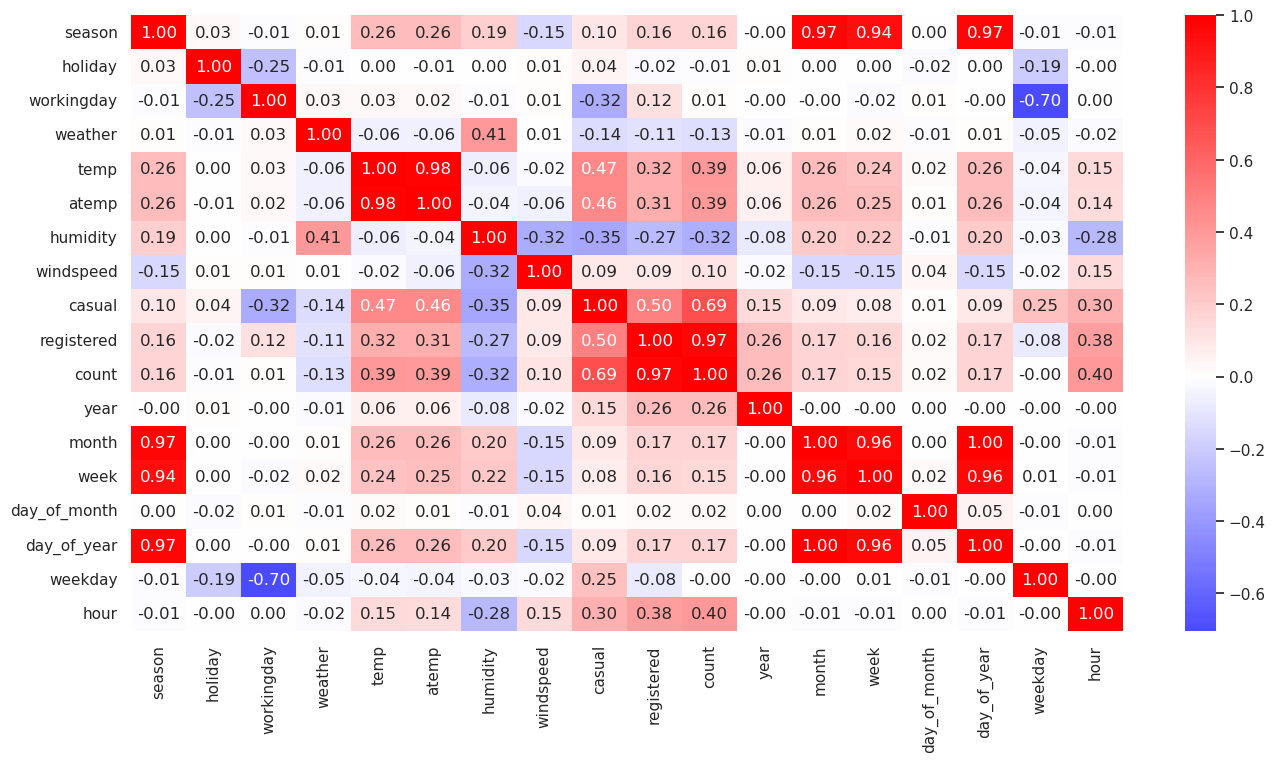

In [300]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(bike.corr(numeric_only=True), cmap="bwr", annot=True, fmt="0.2f", center=0.0);

Chosen features are: temp, humidity, windspeed, year, week, hour

### Train-test-split

In [301]:
from sklearn.model_selection import train_test_split

X = bike[['temp', 'humidity', 'windspeed', "weather",  'year', 'month','weekday', 'hour']]
y = bike['count']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

ytrain_original = ytrain.copy()
ytest_original = ytest.copy()

### RFE feature selection (try VIF)

In [302]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, PoissonRegressor
from sklearn.feature_selection import RFE

for model in [LinearRegression(), Lasso(), Ridge(), ElasticNet(), PoissonRegressor()]:
    rfe = RFE(estimator=model)
    rfe.fit(Xtrain, ytrain)

    print(model)
    print(list(Xtrain.columns))
    print(rfe.support_)
    print(rfe.ranking_)
    print()

LinearRegression()
['temp', 'humidity', 'windspeed', 'weather', 'year', 'month', 'weekday', 'hour']
[ True False False  True  True False False  True]
[1 3 5 1 1 2 4 1]

Lasso()
['temp', 'humidity', 'windspeed', 'weather', 'year', 'month', 'weekday', 'hour']
[ True False False False  True  True False  True]
[1 2 4 3 1 1 5 1]

Ridge()
['temp', 'humidity', 'windspeed', 'weather', 'year', 'month', 'weekday', 'hour']
[ True False False  True  True False False  True]
[1 3 5 1 1 2 4 1]

ElasticNet()
['temp', 'humidity', 'windspeed', 'weather', 'year', 'month', 'weekday', 'hour']
[ True False False False  True  True False  True]
[1 2 4 3 1 1 5 1]

PoissonRegressor()
['temp', 'humidity', 'windspeed', 'weather', 'year', 'month', 'weekday', 'hour']
[ True  True False False False  True False  True]
[1 1 3 2 5 1 4 1]



/home/david/.anaconda3/envs/spiced_projects/lib/python3.11/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



### FE with pipeLines and columnTransformer

In [303]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
import numpy as np

In [304]:
sclr = MinMaxScaler()

ohe_pipe = Pipeline([
    ("ohe", OneHotEncoder(sparse_output=False, drop="first")),
])

pol4_scl_pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=4)),
    ("scl", sclr),
])

pol2_scl_pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("scl", sclr),
])

In [305]:
bike_ftransformer = ColumnTransformer(
    [
        ("ohe", ohe_pipe, ["year", "weather"]),
        #("poly2_scl", pol2_scl_pipe, ['temp', 'month']),
        #("poly4_scl", pol4_scl_pipe, ['hour']),
        ("poly_scl", pol4_scl_pipe, ['temp', "humidity", 'windspeed', 'month', 'weekday', 'hour']),
    ],
    remainder=sclr
).set_output(transform="pandas")

Xtrain_fe = bike_ftransformer.fit_transform(Xtrain)
Xtest_fe = bike_ftransformer.transform(Xtest)

ytrain = np.log1p(ytrain_original)
ytest = np.log1p(ytest_original)

#Xtrain_fe.head(5)
#bike_ftransformer


## T+E

### Fit and score Linear Regression Model

In [306]:
from sklearn.metrics import mean_squared_log_error

In [307]:
lr = LinearRegression().fit(Xtrain_fe, ytrain) 

#print("Coefficients:", lr.coef_)
#print("Intercept   :", lr.intercept_)

print("r^2 train :", lr.score(Xtrain_fe, ytrain))
print("r^2 test  :", lr.score(Xtest_fe, ytest))
print()

ytrain_predlog = lr.predict(Xtrain_fe)
ytest_predlog = lr.predict(Xtest_fe)

ytrain_pred = np.expm1(ytrain_predlog)
ytest_pred = np.expm1(ytest_predlog)

#ytrain_pred[ytrain_pred < 0.0] = 0.0
#ytest_pred[ytest_pred < 0.0] = 0.0

print("rmsle train :", np.sqrt(mean_squared_log_error(ytrain_original, ytrain_pred)))
print("rmsle test  :", np.sqrt(mean_squared_log_error(ytest_original, ytest_pred)))

r^2 train : 0.7632105055895899
r^2 test  : 0.7450957615350816

rmsle train : 0.6914877490455702
rmsle test  : 0.7141019862086284


In [308]:
np.array(ytrain_original[:5]), ytrain_pred[:5]

(array([ 35, 251,  53, 296,  16]),
 array([ 25.05632963, 197.71713954,  53.579733  , 222.20654497,
         17.9884352 ]))

Note: Regularization regressors yielded worse results than LinReg so I removed them for notebook length reasons

### GradientBoostingRegressor (chosen model)

In [309]:
from sklearn.ensemble import GradientBoostingRegressor

In [310]:
gbr2 = GradientBoostingRegressor(verbose=True, loss="absolute_error", max_depth=5, n_estimators=400).fit(Xtrain_fe, ytrain)

#print("Coefficients:", r.coef_)
#print("Intercept   :", r.intercept_)

print()
print("r^2 train :", gbr2.score(Xtrain_fe, ytrain))
print("r^2 test  :", gbr2.score(Xtest_fe, ytest))
print()

ytrain_logpred = gbr2.predict(Xtrain_fe)
ytest_logpred = gbr2.predict(Xtest_fe)

ytrain_pred = np.expm1(ytrain_logpred)
ytest_pred = np.expm1(ytest_logpred)

ytrain_pred[ytrain_pred < 0.0] = 0.0
ytest_pred[ytest_pred < 0.0] = 0.0

print("rmsle train :", np.sqrt(mean_squared_log_error(ytrain_original, ytrain_pred)))
print("rmsle test  :", np.sqrt(mean_squared_log_error(ytest_original, ytest_pred)))

      Iter       Train Loss   Remaining Time 
         1           1.0195            2.08m
         2           0.9408            2.07m
         3           0.8693            2.07m
         4           0.8067            2.06m
         5           0.7482            2.05m
         6           0.6965            2.04m
         7           0.6534            2.04m
         8           0.6143            2.03m
         9           0.5801            2.03m
        10           0.5449            2.03m
        20           0.3608            1.99m
        30           0.2911            1.93m
        40           0.2566            1.89m
        50           0.2371            1.84m
        60           0.2242            1.78m
        70           0.2135            1.73m
        80           0.1974            1.67m
        90           0.1919            1.62m
       100           0.1853            1.57m
       200           0.1733            1.04m
       300           0.1699           31.00s
       40

In [311]:
num = 0
for i in ytest_pred == 0.0:
    if i == True:
        num += 1
print(num)

0


### Hyperparameter Optimization

In [58]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(GradientBoostingRegressor(loss="absolute_error", random_state=42),
        param_grid=
        {
            "learning_rate": [0.05, 0.1, 0.2],
            "n_estimators" : [100],
            "max_depth"    : [3],
            "max_features" : ["sqrt"],
        },
        scoring='neg_mean_absolute_error',
        n_jobs=1,
        cv=5,
        return_train_score=True
        )

In [59]:
#grid.fit(Xtrain_fe, ytrain_original);

In [60]:
#pd.DataFrame(grid.cv_results_)

## Create submission for kaggle

In [280]:
biketest = pd.read_csv("../data/test.csv", index_col=0, parse_dates=True)
biketest

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014


In [281]:
biketest["year"] = biketest.index.year
biketest["month"] = biketest.index.month
biketest["week"] = biketest.index.isocalendar().week
biketest["day_of_month"] = biketest.index.day
biketest["day_of_year"] = biketest.index.day_of_year
biketest["weekday_name"] = biketest.index.day_name()
biketest["weekday"] = biketest.index.weekday #from 0-6
biketest["hour"] = biketest.index.hour

In [282]:
Xrealtest = biketest[['temp', 'humidity', 'windspeed', "weather", 'year', 'month','weekday', 'hour']]

In [283]:
Xrealtest_fe = bike_ftransformer.transform(Xrealtest)

In [284]:
yrealtestpred = gbr2.predict(Xrealtest_fe)
yrealtestpred[yrealtestpred < 0.0] = 0.0

Xrealtest_fe["count"] = np.expm1(yrealtestpred)

In [285]:
export = Xrealtest_fe[["count"]].reset_index()
export

,datetime,count
0,2011-01-20 00:00:00,11.248630
1,2011-01-20 01:00:00,4.735565
2,2011-01-20 02:00:00,3.339549
3,2011-01-20 03:00:00,2.299670
4,2011-01-20 04:00:00,1.975465
...,...,...
6488,2012-12-31 19:00:00,327.383126
6489,2012-12-31 20:00:00,246.656021
6490,2012-12-31 21:00:00,181.343368
6491,2012-12-31 22:00:00,111.887593


In [286]:
export.to_csv("../data/bike_pred_v4.csv", index=False)